# DDPLKO Moduł 3 - praca domowa - pierwszy własny trening CNN

In [1]:
import urllib
import numpy as np
import matplotlib.pyplot as plt
import os

# Wybierz 10 klas

Poniżej przygotuj listę 10 klas z:
https://quickdraw.withgoogle.com/data

> nazwy takie jak nazwy obiektów (wyświetlane po najechaniu lub kliknięciu)

In [3]:
class_names=['donut', 'alarm clock', 'baseball', 'blueberry', 'cookie', 
             'compass', 'hamburger', 'soccer ball', 'wheel', 'watermelon']

## Test

In [4]:
assert len(class_names)==10, 'Nazw powinno być dokładnie 10'
for i in range(len(class_names)):
    assert type(class_names[i])==str, 'Każda z nazw powinna być typu str'
    assert '/' not in class_names[i], 'Same nazwy klas, ze spacjami, bez ukośników'

# Wczytanie danych
Pobieranie plików z obrazami w formaci npy (numpy)

In [5]:
for name in class_names:
    url = 'https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/%s.npy'%name
    file_name = url.split('/')[-1].split('?')[0]

    url = url.replace(' ','%20')
    
    if not os.path.isfile(file_name):
        print(url, '==>', file_name)
        urllib.request.urlretrieve(url, file_name)

## Wczytywanie z plików .npy
Dane znajdziesz w tablicy data

In [6]:
data = []
for name in class_names:
    file_name = name+'.npy'
    data.append(np.load(file_name, fix_imports=True, allow_pickle=True))
    print('%-15s'%name,type(data[-1]))

donut           <class 'numpy.ndarray'>
alarm clock     <class 'numpy.ndarray'>
baseball        <class 'numpy.ndarray'>
blueberry       <class 'numpy.ndarray'>
cookie          <class 'numpy.ndarray'>
compass         <class 'numpy.ndarray'>
hamburger       <class 'numpy.ndarray'>
soccer ball     <class 'numpy.ndarray'>
wheel           <class 'numpy.ndarray'>
watermelon      <class 'numpy.ndarray'>


# Liczebności i wymiary zdjęć
Wypisz nazwę i shape dla każdej klasy

In [7]:
print('Old data')
for idx, name in enumerate(class_names):
    print('%-15s'%name, data[idx].shape)
    
for idx in range(len(data)):
    data[idx] = data[idx][:int(0.25*data[idx].shape[0]), :]
    
print('\nReduced data')
for idx, name in enumerate(class_names):
    print('%-15s'%name, data[idx].shape)

Old data
donut           (140751, 784)
alarm clock     (123399, 784)
baseball        (135375, 784)
blueberry       (127878, 784)
cookie          (131353, 784)
compass         (127609, 784)
hamburger       (129672, 784)
soccer ball     (125349, 784)
wheel           (136659, 784)
watermelon      (132939, 784)

Reduced data
donut           (35187, 784)
alarm clock     (30849, 784)
baseball        (33843, 784)
blueberry       (31969, 784)
cookie          (32838, 784)
compass         (31902, 784)
hamburger       (32418, 784)
soccer ball     (31337, 784)
wheel           (34164, 784)
watermelon      (33234, 784)


Poniżej zwizualizuj liczbę zdjęć per klasę:

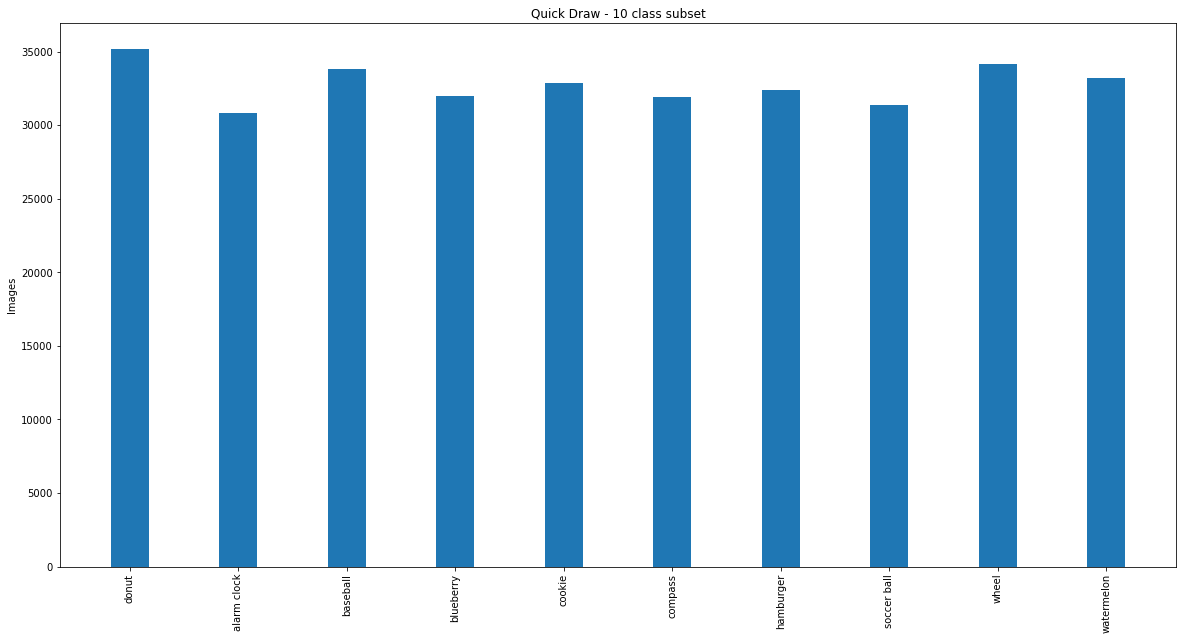

In [8]:
# plot size
plt.rcParams["figure.figsize"] = (20, 10)

plt.bar(class_names, [_.shape[0] for _ in data], width=0.35)

plt.ylabel('Images')
plt.title('Quick Draw - 10 class subset');
plt.xticks(rotation=90);

# Wizualizacja danych
Dane są w macierzach dwuwyamirowych,
aby je poprawnie wyświetlić jako obraz,
należy je przekonwertować do 3 wymiarów:

- numer zdjęcia
- wysokość
- szerokość

Tu pomoże `reshape` z numpy.

## Konwersja do (-1, 28, 28)

In [9]:
data = [_.reshape(-1, 28, 28) for _ in data]

Wyświetl po jednym przykładzie z każdej klasy.

Możesz skorzystać z `plt.subplot`

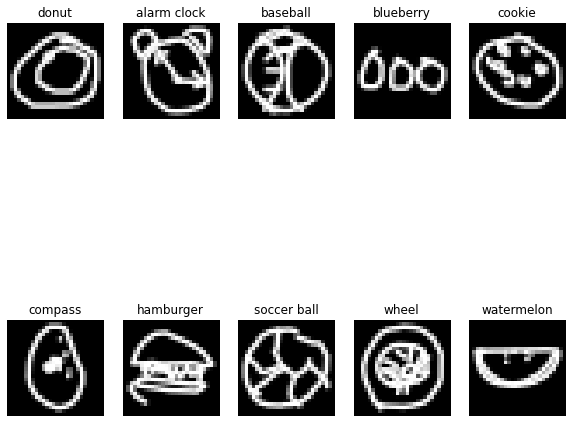

In [10]:
plt.figure(figsize=(10, 10))
for i, class_pictures in enumerate(data):
    plt.subplot(2, 5, 1+i)
    plt.imshow(class_pictures[0], cmap='gray', vmin=0, vmax=255)
    plt.title(class_names[i])
    plt.axis('off')

## Obraz średni
Jak podobne do siebie są obrazy z poszczególnych klas?

Oblicz i wyświetl średni obraz dla wszystkich klas.

Możesz skorzystać z `np.mean`

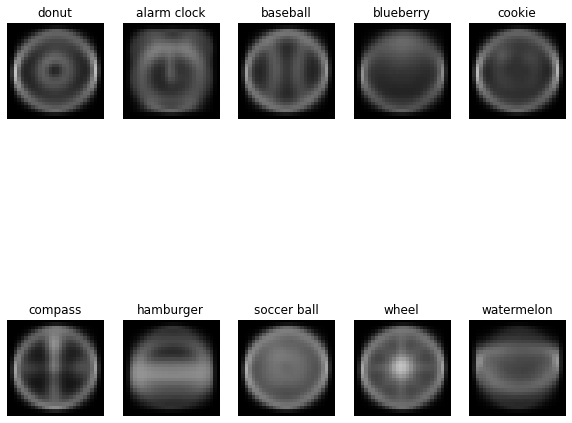

In [11]:
plt.figure(figsize=(10, 10))

for i, class_pictures in enumerate(data):
    plt.subplot(2, 5, 1+i)
    plt.imshow(np.mean(class_pictures, axis=0), cmap='gray', vmin=0, vmax=255)
    plt.title(class_names[i])
    plt.axis('off')

# Trening w TensorFlow

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(style='whitegrid', font_scale=1.5)
import tensorflow as tf

for gpu in tf.config.list_physical_devices('GPU'):
    tf.config.experimental.set_memory_growth(gpu, True)

# Przygotowanie danych
Przygotowanie listy etykiet oraz macierzy zdjęć
Przygotuj:
- [ ] X - jako macierz numpy w której będą wszystkie zdjęcia
- [ ] y - jako macierz numpy w której będą wszystkie etykiety (jako numer klasy)
- [ ] wykonaj reshape dla X do (-1,28,28,1)

Co może Ci się przydać:
- łączenie macierzy - np.concatenate
- mnożenie listy przez N zwraca listę z N-krotnie więcej elementami [0]*3 ==>> [0,0,0]
- konwersja listy do macierzy numpy - np.array([0,1,2,3])

Korzystając z pythonowych zapisów możesz to zrobić w jednej lini per zmienną, nie zapisuj w obu w jednej, bo to już nie będzie czytelne (tak, da się)

In [13]:
X = np.reshape((np.concatenate(data)), (-1, 28, 28, 1))
y = np.concatenate([[idx]*len(category) for idx, category in enumerate(data)])

## Test

In [14]:
assert type(X)==np.ndarray,                 "X powinno być macierzą numpy"
assert type(y)==np.ndarray,                 "y powinno być macierzą numpy"
assert len(X)==sum([len(_) for _ in data]), "X powinno mieć tyle samo przykładów ile jest w data"
assert len(y)==sum([len(_) for _ in data]), "Y powinno mieć tyle samo etykiet ile jest przykładów w data"
assert len(X.shape)==4,                     "X - Wymagane są 4 wymiary - index, wysokość, szerokość, głębokość"
assert len(y.shape)==1,                     "y - Wymagany jest 1 wymiar"
assert X.shape[1:]==(28,28,1),              "Zdjęcia powinny być 28x28x1"

## Normalizacja

Przygotuj dane (X) w taki sposób by wartości były bliskie zera.
W celu zachowania prostoty - podziel wartości przez 255, a nie przez najwyższą wartość.
Nie przesuwaj średniej do zera, i nie normalizuj odchylenia.

In [15]:
X = X / 255

### Test

In [16]:
assert np.max(X)<=1, "Największa wartość nie może być większa niż 1"
assert np.min(X)>=0, "Pracujmy w zakresie od 0..1"

## Podział zbioru danych

Podziel zbiór zachowując ten sam stosunek liczby klas w train i val.
Do podziału użyj `train_test_split` z `sklearn`.

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(
                        X, y, train_size=0.8, test_size=0.2, stratify=y)

### Wizualizacja podziału

Przygotuj wykres, który pokaże jak dane train i val sumują się dla poszczególnych klas (trening+val powinny być jako jeden słupek, sumarycznie wysokości słupka przed podziałem). Podpowiedź - stacked bar plot.
Przygotuj drugi wykres, który pokaże czy zbiór danych jest podzielony z zachowaniem stosunku liczebności poszczególnych klas (zachowanie procentowych udziałów klas w zbiorze).

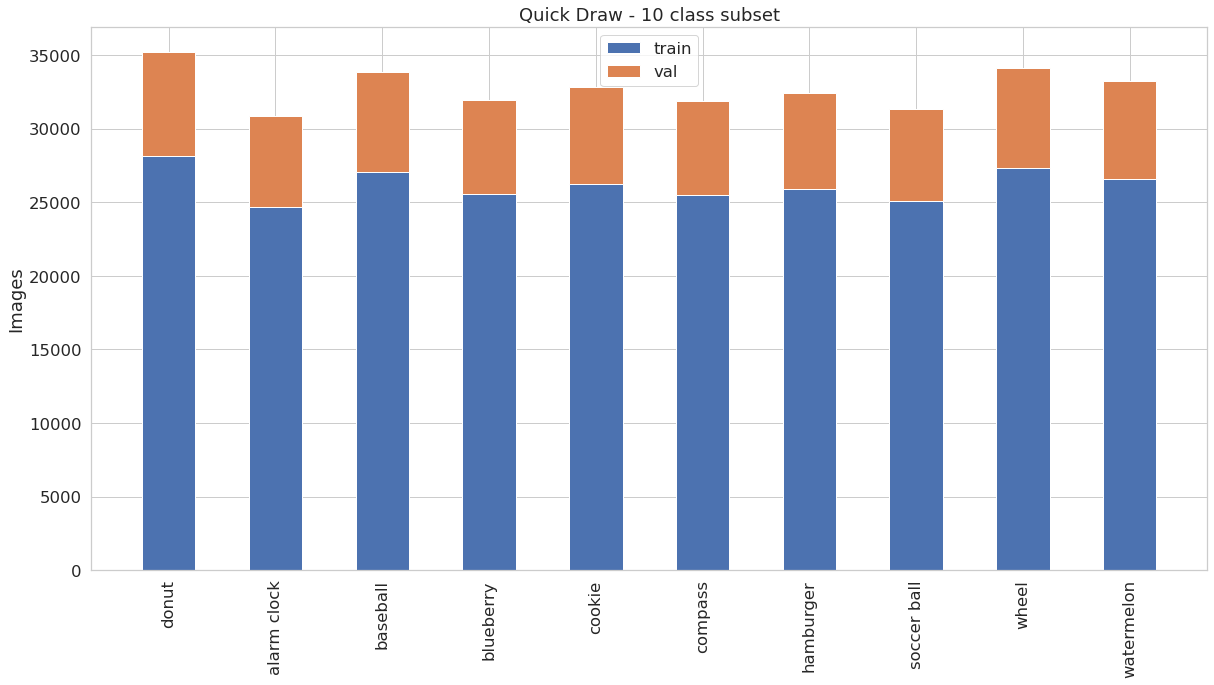

In [18]:
train_counter = {class_name: list(y_train).count(idx) for idx, class_name in enumerate(class_names)}
val_counter = {class_name: list(y_val).count(idx) for idx, class_name in enumerate(class_names)}

y1 = list(train_counter.values())
y2 = list(val_counter.values())

bar_width = 0.5

plt.bar(class_names, y1, label='train', width=bar_width)
plt.bar(class_names, y2, bottom=y1, label='val', width=bar_width)
plt.xticks(range(len(class_names)), class_names, rotation=90)
plt.legend(['train', 'val'])
plt.ylabel('Images')
plt.title('Quick Draw - 10 class subset')
plt.show()

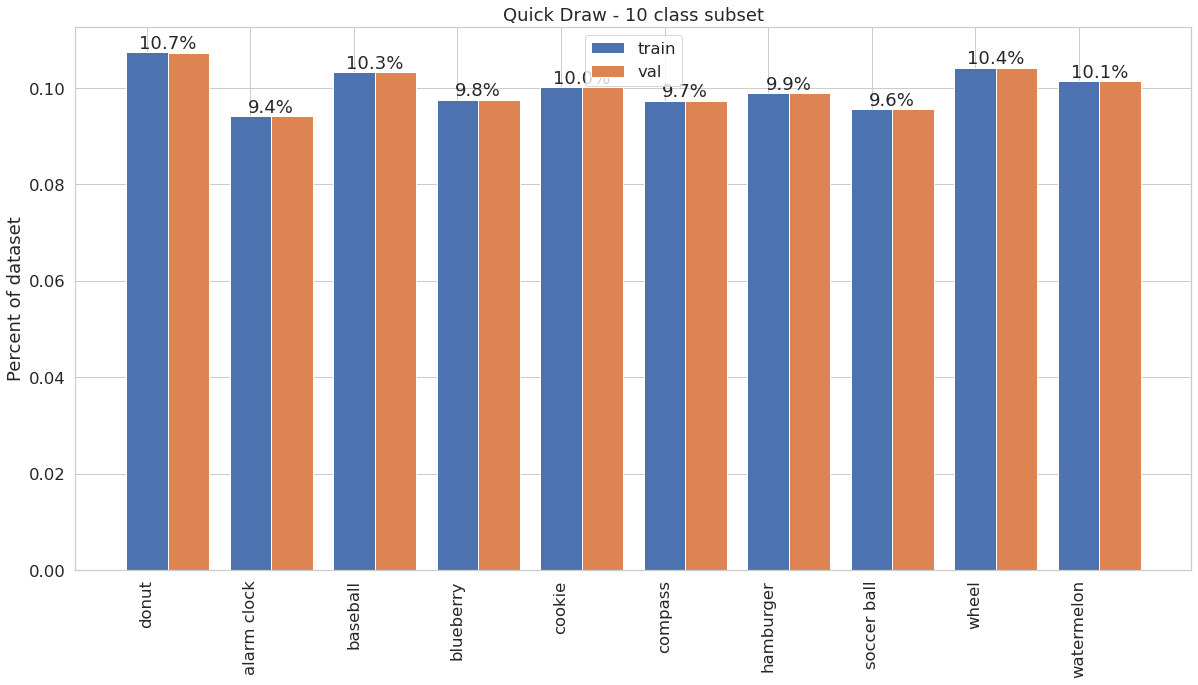

In [19]:
train_percentages = {class_name: count / len(y_train) for class_name, count in train_counter.items()}
val_percentages = {class_name: count / len(y_val) for class_name, count in val_counter.items()}
    
train_data = list(train_percentages.values())
val_data = list(val_percentages.values())


# plot size
plt.rcParams["figure.figsize"] = (20,10)

# bar positions
bar_width = 0.4
b1 = np.arange(len(class_names))
b2 = [x + bar_width for x in b1]


bar1 = plt.bar(b1, train_data, width=bar_width)
bar2 = plt.bar(b2, val_data, width=bar_width)
plt.xticks(range(len(class_names)), class_names, rotation=90);

# text above bars
for rect, bar_value in zip(bar1, train_data):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width(), height, f'{100*bar_value:.1f}%', ha='center', va='bottom')
    
plt.legend(['train', 'val'])
plt.ylabel('Percent of dataset');
plt.title('Quick Draw - 10 class subset');


## Test podziału danych

In [20]:
assert all((np.unique(y_train, return_counts=True)[1]/len(y_train)).round(2) == (np.unique(y_val, return_counts=True)[1]/len(y_val)).round(2)), "Nierówny podział danych, zadbaj by rozkład w train i val były takie same"

# Przygotuj model

- Wykorzystaj warstwy konwolucyjne (minimum 1), pamiętaj o funkcjach aktywacji
- Wykorzystaj Flatten
- Model powinien mieć:
  - wejście 28,28,1
  - 10 wyjść
  - Adama jako optymalizator
  - sparse CE loss
  - warto dodać accuracy jako metrykę
  
Pooling wprowadzimy w module 4, a i bez niego uzyskasz >80% accuracy.

In [20]:
def getModel():
    model = tf.keras.models.Sequential([
                tf.keras.layers.Conv2D(4, (3, 3), activation='relu', input_shape=(28, 28, 1)),
                tf.keras.layers.Conv2D(8, (3, 3), activation='relu'),
                tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
                tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
                tf.keras.layers.Flatten(),
                tf.keras.layers.Dense(10, activation='softmax')])
    model.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
    return model
model = getModel()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 4)         40        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 8)         296       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 16)        1168      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 20, 20, 32)        4640      
_________________________________________________________________
flatten (Flatten)            (None, 12800)             0         
_________________________________________________________________
dense (Dense)                (None, 10)                128010    
Total params: 134,154
Trainable params: 134,154
Non-trainable params: 0
__________________________________________________

## Test

In [21]:
assert type(model)==tf.keras.models.Sequential, "Model powinien być tf.keras.models.Sequential"
assert model.compiled_loss is not None, "Skompiluj model"
assert model.loss == 'sparse_categorical_crossentropy', "Użyj jako loss 'sparse_categorical_crossentropy'"
assert model.count_params()>7850, "Zbuduj większy model"
assert all(['linear' not in str(l.activation) for l in model.layers if 'activation' in dir(l)]), 'Gdy nie podasz aktywacji, aktywacją jest funkcja liniowa; użyj ReLU, bądź softmax, odpowiednio'
assert any(['Conv2D' in str(l) for l in model.layers if 'activation' in dir(l)]), 'Użyj konwolucji 2D'
assert list(model.input.shape)==[None,28,28,1], "Wejście do modelu powinno mieć rozmiar None,28,28,1"
assert list(model.output.shape)==[None,10],     "Wyjście z modelu powinno mieć rozmiar None,10"
assert "Adam" in str(model.optimizer), "Użyj adama jako optymalizatora"

# Trening

Wykonaj trening:
- 10 epok
- batch size - wybierz pomiędzy 1 a ile Ci się zmieści na GPU (np. 256)
- z walidacją
- zapisz wynik funkcji model.fit do zmiennej `history`

In [22]:
epochs = 10
batch_size = 256

history = model.fit(X_train, y_train ,epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val))

Epoch 1/10
1025/1025 [==============================] - 13s 10ms/step - loss: 0.7420 - accuracy: 0.7701 - val_loss: 0.5990 - val_accuracy: 0.8166
Epoch 2/10
1025/1025 [==============================] - 10s 10ms/step - loss: 0.5459 - accuracy: 0.8311 - val_loss: 0.5291 - val_accuracy: 0.8369
Epoch 3/10
1025/1025 [==============================] - 10s 10ms/step - loss: 0.4883 - accuracy: 0.8502 - val_loss: 0.4986 - val_accuracy: 0.8462
Epoch 4/10
1025/1025 [==============================] - 10s 10ms/step - loss: 0.4518 - accuracy: 0.8603 - val_loss: 0.4864 - val_accuracy: 0.8523
Epoch 5/10
1025/1025 [==============================] - 10s 10ms/step - loss: 0.4243 - accuracy: 0.8690 - val_loss: 0.4801 - val_accuracy: 0.8523
Epoch 6/10
1025/1025 [==============================] - 10s 10ms/step - loss: 0.4033 - accuracy: 0.8748 - val_loss: 0.4748 - val_accuracy: 0.8553
Epoch 7/10
1025/1025 [==============================] - 10s 10ms/step - loss: 0.3854 - accuracy: 0.8809 - val_loss: 0.4852 -

## Wizualizacja historii treningu

Przygotuj wykres na którym pokażesz jak podczas treningu zmieniało się training i validation accuracy.

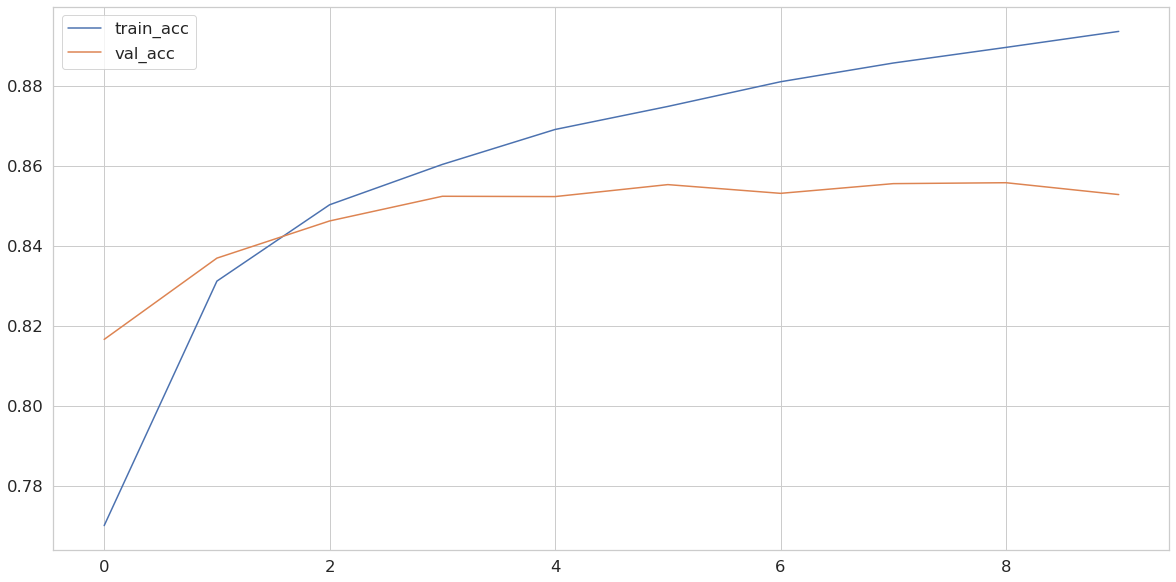

In [23]:
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend();

### Test

In [24]:
assert list(history.history.keys())==['loss', 'accuracy', 'val_loss', 'val_accuracy'], "Trening powinien być z walidacją oraz metryką accuracy"
assert len(history.history['loss'])==10, "Wystarczy 10 epok"

In [25]:
# free GPU mem
del model

# Pytorch Lightning

In [21]:
import torch
from torch.nn import functional as F
from torch import nn
from torch.utils.data import TensorDataset, DataLoader

from torchvision import datasets, transforms

from pytorch_lightning.core.lightning import LightningModule
from pytorch_lightning import Trainer
from torchmetrics.functional.classification.accuracy import accuracy

## klasa QuickDrawCNN_PL

- [ ] Zamień dane na Tensory
- [ ] Przekonwertuj dane do formatu NCHW z NHWC
- [ ] Zapewnij odpowiedni typ danych dla etykiet
- [ ] Przygotuj zbiór danych - skorzystaj z `TensorDataset`
- [ ] Zaprojektuj architekturę sieci z minimum 1 warstwą konwolucyjną

In [89]:
class QuickDrawCNN_PL(LightningModule):
    def __init__(self, X_train,y_train,X_val,y_val):
        super().__init__()
        
        self.X_train=np.transpose(torch.from_numpy(X_train), (0, 3, 1, 2))
        self.X_val=np.transpose(torch.from_numpy(X_val), (0, 3, 1, 2))
        self.y_train=torch.from_numpy(y_train)
        self.y_val=torch.from_numpy(y_val)
        self.train_dataset = TensorDataset(self.X_train, self.y_train)
        self.val_dataset = TensorDataset(self.X_val, self.y_val)
        
        ####################
        ### Don't chagne ###
        assert type(self.X_train)==torch.Tensor
        assert self.X_train.shape==torch.Size([len(X_train), 1, 28, 28])
        assert self.X_train.dtype==torch.float64, "Typ X_train niepoprawny"
        
        assert type(self.y_train)==torch.Tensor
        assert self.y_train.shape==torch.Size([len(y_train)])
        assert self.y_train.dtype==torch.int64, "Typ y_train niepoprawny"
        
        assert type(self.X_val)==torch.Tensor
        assert self.X_val.shape==torch.Size([len(X_val), 1, 28, 28])
        assert self.X_val.dtype==torch.float64, "Typ X_val niepoprawny"

        assert type(self.y_val)==torch.Tensor
        assert self.y_val.shape==torch.Size([len(y_val)])
        assert self.y_val.dtype==torch.int64, "Typ y_val niepoprawny"
        ### Don't chagne ###
        ####################
        

        self.num_classes = 10
        self.dims = (1, 28, 28)
        channels, width, height = self.dims

        self.model = nn.Sequential(
                nn.Conv2d(channels, 8, 3),
                nn.ReLU(),
                nn.Conv2d(8, 16, 3),
                nn.ReLU(),
                nn.Conv2d(16, 32, 3),
                nn.ReLU(),
                nn.Flatten(),
                nn.Linear(15488, 10),
        )
        
        ####################
        ### Don't chagne ###
        assert any(['Conv2d' in str(_) for _ in self.model]), "Zastosuj przynajmniej jedną warstwę Conv2d"
        assert len([_ for _ in self.model if 'Conv2d' in str(_)])==len([_ for _ in self.model if 'ReLU' in str(_)]), "Po każdej warstwie Conv2d zastosuj funkcję aktywacji ReLU"
        ### Don't chagne ###
        ####################
    def forward(self, x):
        x = self.model(x)
        return F.log_softmax(x, dim=1)

    def training_step(self, batch, batch_idx):
        x, y = batch
        logits = self(x)
        loss = F.nll_loss(logits, y)
        return loss
    
    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=1e-3)
    
    def validation_step(self, batch, batch_idx):
        x, y = batch
        logits = self(x)
        loss = F.nll_loss(logits, y)
        preds = torch.argmax(logits, dim=1)
        acc = accuracy(preds, y)

        # Calling self.log will surface up scalars for you in TensorBoard
        self.log('val_loss', loss, prog_bar=True)
        self.log('val_acc', acc, prog_bar=True)
        return loss

    def test_step(self, batch, batch_idx):
        # Here we just reuse the validation_step for testing
        return self.validation_step(batch, batch_idx)

    def train_dataloader(self):
        return DataLoader(self.train_dataset, batch_size=batch_size, num_workers=4)

    def val_dataloader(self):
        return DataLoader(self.val_dataset, batch_size=batch_size, num_workers=4)

### Trening

- [ ] Uruchom trening na 10 epok
- [ ] Batch size ustaw na wartość np. od 32 do 256 (możesz mniej, możesz więcej)
- [ ] Utwórz instancję klasy QuickDrawCNN_PL
- [ ] Przygotuj `Trainer`
- [ ] Uruchom trening

In [90]:
model = QuickDrawCNN_PL(X_train=X_train,
                       y_train=y_train,
                       X_val=X_val,
                       y_val=y_val)
model.double()
# x = torch.randn(1, 1, 28, 28)
# model(x).shape
epochs = 10

trainer = Trainer(
    gpus=1,
    max_epochs=epochs,
    auto_scale_batch_size="binsearch")

trainer.fit(model)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type       | Params
-------------------------------------
0 | model | Sequential | 160 K 
-------------------------------------
160 K     Trainable params
0         Non-trainable params
160 K     Total params
0.643     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: -1it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

### Uruchom TensorBoard do wizualizacji wyników

In [92]:
%load_ext tensorboard
%tensorboard --logdir lightning_logs/

# PyTorch

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(style='whitegrid', font_scale=1.5)
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [32]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 8, 3)
        self.conv2 = nn.Conv2d(8, 16, 3)
        self.conv3 = nn.Conv2d(16, 32, 3)
        self.fc = nn.Linear(15488, 10)
        
    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = self.conv3(x)
        x = F.relu(x)
        x = torch.flatten(x, 1)
        # print(x.shape)
        x = self.fc(x)
        output = F.log_softmax(x, dim=1)
        return output

In [33]:
torch.cuda.is_available()

True

In [37]:
device = torch.device('cuda')
print(device)
print(torch.cuda.current_device())
print(torch.cuda.device(0))
print(torch.cuda.get_device_name(0))

epochs = 10
batch_size = 256

X_train=torch.from_numpy(np.transpose((X_train), (0, 3, 1, 2)))
X_val=torch.from_numpy(np.transpose((X_val), (0, 3, 1, 2)))
y_train=torch.from_numpy(y_train)
y_val=torch.from_numpy(y_val)

train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)

model = Net().to(device)
model.double()
# x = torch.randn(1, 1, 28, 28)
# x = x.to(device)
# model.forward(x).shape
optimizer = optim.Adam(model.parameters())

train_losses, val_losses = [], []
train_accs, val_accs = [], []

for epoch in range(1, epochs + 1):
    model.train()
    train_loss=0
    correct=0
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().detach()
        train_loss+=loss.detach()
    train_loss/=len(train_loader)
    acc = correct / float(len(train_loader.dataset))
    train_losses.append(train_loss)
    train_accs.append(acc)
    
    model.eval()
    val_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in val_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            val_loss += F.nll_loss(output, target, reduction='sum').detach()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().detach()
        

    val_loss /= len(val_loader.dataset)
    val_acc = correct / float(len(val_loader.dataset))
    val_losses.append(val_loss)
    val_accs.append(val_acc)
    
    print("Epoch %3d Train loss: %f Acc: %f Val   loss: %f Acc: %f"%(epoch, train_loss, acc, val_loss, val_acc))

cuda
0
NVIDIA GeForce GTX 1060
Epoch   1 Train loss: 1.197019 Acc: 0.631449 Val   loss: 0.899690 Acc: 0.722650
Epoch   2 Train loss: 0.793193 Acc: 0.760317 Val   loss: 0.762688 Acc: 0.762742
Epoch   3 Train loss: 0.679188 Acc: 0.794136 Val   loss: 0.738067 Acc: 0.771804
Epoch   4 Train loss: 0.613787 Acc: 0.812023 Val   loss: 0.673457 Acc: 0.790691
Epoch   5 Train loss: 0.579371 Acc: 0.822062 Val   loss: 0.602969 Acc: 0.814581
Epoch   6 Train loss: 0.546152 Acc: 0.831917 Val   loss: 0.582666 Acc: 0.819463
Epoch   7 Train loss: 0.527677 Acc: 0.838050 Val   loss: 0.746725 Acc: 0.773482
Epoch   8 Train loss: 0.518284 Acc: 0.840567 Val   loss: 0.545396 Acc: 0.834078
Epoch   9 Train loss: 0.499692 Acc: 0.846895 Val   loss: 0.567875 Acc: 0.828190
Epoch  10 Train loss: 0.488088 Acc: 0.850312 Val   loss: 0.552322 Acc: 0.830676


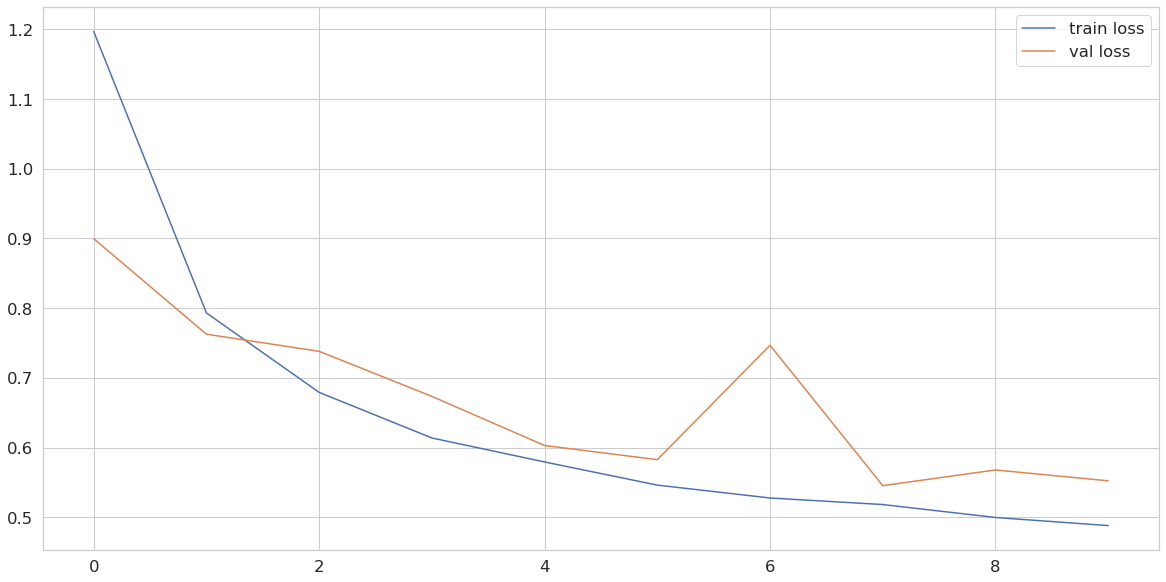

In [38]:
train_losses = [_.cpu() for _ in train_losses]
val_losses = [_.cpu() for _ in val_losses]
plt.plot(train_losses, label='train loss')
plt.plot(val_losses, label='val loss')
plt.legend();

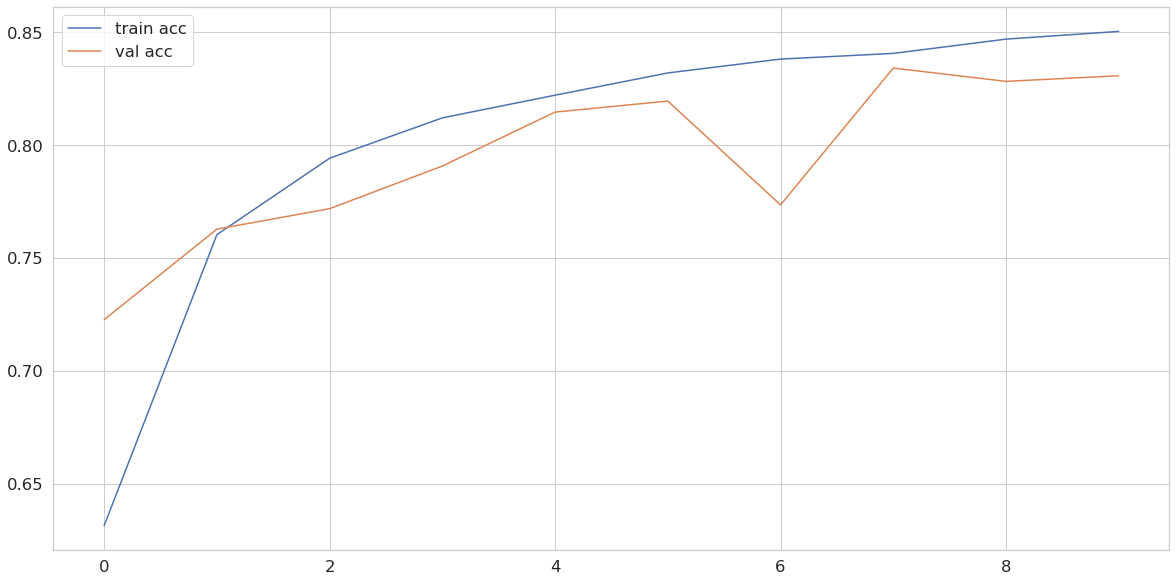

In [39]:
train_accs = [_.cpu() for _ in train_accs]
val_accs = [_.cpu() for _ in val_accs]
plt.plot(train_accs, label='train acc')
plt.plot(val_accs, label='val acc')
plt.legend();

# Wyślij rozwiązanie
Możesz skorzystać z jednego z poniższych sposobów:
**mailem na specjalny adres** ze strony pracy domowej w panelu programu prześlij jedno z poniższych:
- notebooka (jeżeli plik ma mniej niż np. 10MB)
- notebooka w zipie
- link do Colaba (udostępniony)
- link do pliku przez GDrive/Dropboxa/WeTransfer/...
- pdfa (poprzez download as pdf)
- jako plik w repozytorium na np. GitHubie, by budować swoje portfolio (wtedy uważaj na wielkość pliku, najlepiej kilka MB, Max 25MB)

Najlepiej, by w notebooku było widać wyniki uruchomienia komórek, chyba, że przez nie plik będzie mieć 100+MB wtedy najlepiej Colab lub jakieś przemyślenie co poszło nie tak (zbyt dużo dużych zdjęć wyświetlonych w komórkach).

## Co otrzymasz?
Informację zwrotną z ewentualnymi sugestiami, komentarzami.